#Data cleaning

In [ ]:
import pandas as pd
import numpy as np

##Reading in data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/survey.csv')

In [ ]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [ ]:
for col in df.columns:
    print(col)

Timestamp
Age
Gender
Country
state
self_employed
family_history
treatment
work_interfere
no_employees
remote_work
tech_company
benefits
care_options
wellness_program
seek_help
anonymity
leave
mental_health_consequence
phys_health_consequence
coworkers
supervisor
mental_health_interview
phys_health_interview
mental_vs_physical
obs_consequence
comments


In [ ]:
for col in df.columns:
    print(np.sum(df[col].isna()))

0
0
0
0
515
18
0
0
264
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1095


##Cleaning the 'age' column
For this column, I decided to clip the age range from 18-70, so that there would not be any extreme outliers.

In [ ]:
df['Age'] = [age if age >18 else 18 for age in df['Age']]
df['Age'] = [age if age <70 else 70 for age in df['Age']]

In [ ]:
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 70, 55,
       48, 20, 57, 58, 47, 62, 51, 65, 49, 53, 61])

In [ ]:
np.sum(df['Age'].isna())

0

##Cleaning the 'gender' column
For this column, I looked at all the unique values and decided to put all these values into 3 categories: male, female, and other.

In [ ]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [ ]:
malenames = ["male", "man", "m", "cis male","mal", "male ","cis man","maile","male (cis)","mail","msle","malr"]
femalenames = ["female", "f", "cis female","femake", "woman","cis-female/femme","female (cis)","female "]
for i in range(len(df)):
  if (df.iloc[i, 2].lower() in malenames):
    df.iloc[i, 2] = 'M'
  elif (df.iloc[i, 2].lower() in femalenames):
    df.iloc[i, 2] = 'F'
  else:
    df.iloc[i, 2] = 'O'
#othernames = ["male-ish","trans-female","something kinda male?","queer/she/they","non-binary", "Make", "Nah", "All", "Enby", "fluid", 'Genderqueer']
df['Gender'].unique()

array(['F', 'M', 'O'], dtype=object)

In [ ]:
np.sum(df['Gender'].isna())

0

##'Comments' column
Since most values in the Comments column were null, I decided to drop the comments column.

In [ ]:
df = df.drop(['comments'], axis = 1)

##'Treatment' column
I made sure that all individuals had treatement reported.


In [ ]:
np.sum(df['treatment'].isna())

0

##Dropping columns
I dropped columns with too many null values or that were not relevant to the project, such as state, work interfere, and timestamp.

In [ ]:
df = df.drop(['state'], axis = 1)

In [ ]:
df = df.drop(['work_interfere'], axis = 1)

In [ ]:
for col in df.columns:
    print(col)

Timestamp
Age
Gender
Country
self_employed
family_history
treatment
no_employees
remote_work
tech_company
benefits
care_options
wellness_program
seek_help
anonymity
leave
mental_health_consequence
phys_health_consequence
coworkers
supervisor
mental_health_interview
phys_health_interview
mental_vs_physical
obs_consequence


In [ ]:
for col in df.columns:
    print(np.sum(df[col].isna()))

0
0
0
0
18
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
df= df.dropna()

In [ ]:
df = df.drop(['Timestamp'], axis = 1)

In [ ]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,M,United States,Yes,Yes,No,1-5,Yes,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
19,36,M,France,Yes,Yes,No,6-25,Yes,Yes,No,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
20,29,M,United States,No,Yes,Yes,100-500,No,Yes,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31,M,United States,Yes,No,No,1-5,Yes,Yes,No,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,M,United States,No,No,Yes,26-100,Yes,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No


##Saving cleaned data

In [ ]:
df.to_csv('/content/drive/My Drive/survey_cleaned.csv',index =False)

#Data Exploration

In [ ]:
df = pd.read_csv('/content/drive/My Drive/survey_cleaned.csv')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

##Finding baseline accuracy

In [ ]:
df['treatment'].value_counts()

Yes    628
No     613
Name: treatment, dtype: int64

In [ ]:
628/(628+613)

0.5060435132957293

##Plotting a histogram with treatment values

In [ ]:
df['treatment'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
list(df['treatment'].value_counts())

[628, 613]

In [ ]:
df['treatment'].value_counts().index

Index(['Yes', 'No'], dtype='object')

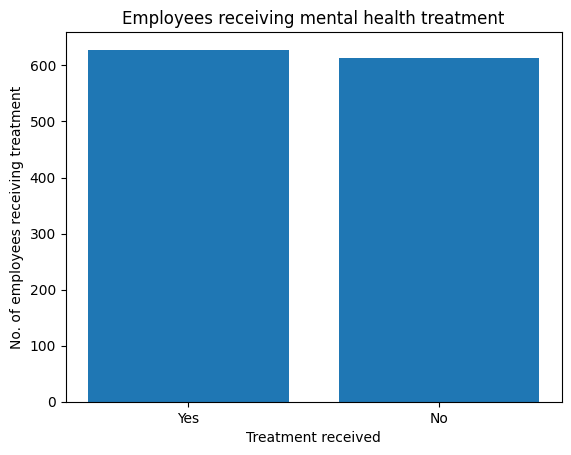

In [ ]:
plt.bar(df['treatment'].value_counts().index, list(df['treatment'].value_counts()))

plt.xlabel("Treatment received")
plt.ylabel("No. of employees receiving treatment")
plt.title("Employees receiving mental health treatment")
plt.show()

##Plotting the distribution of ages in the dataset

Text(0.5, 1.0, 'Ages of employees')

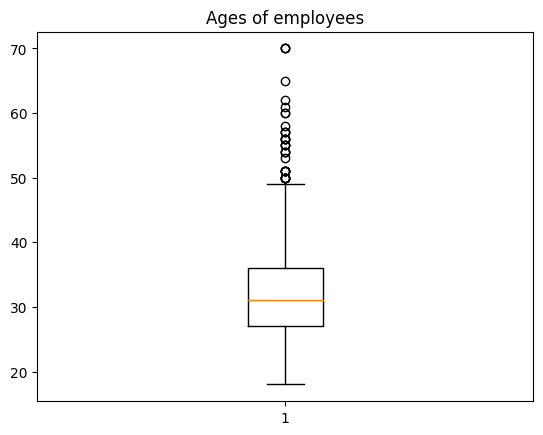

In [ ]:
plt.boxplot(df['Age'])
plt.title("Ages of employees")

Text(0.5, 1.0, 'Ages of employees')

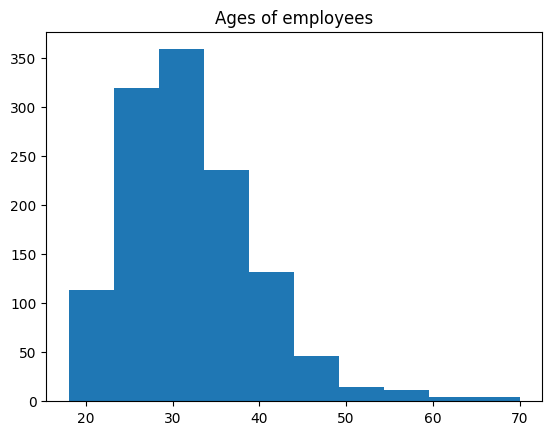

In [ ]:
plt.hist(df['Age'])
plt.title("Ages of employees")

##Plotting the number of people in each gender category

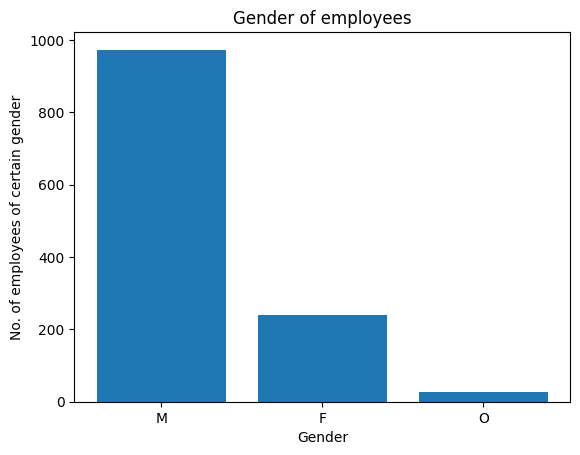

In [ ]:
plt.bar(df['Gender'].unique(), list(df['Gender'].value_counts()))

plt.xlabel("Gender")
plt.ylabel("No. of employees of certain gender")
plt.title("Gender of employees")
plt.show()

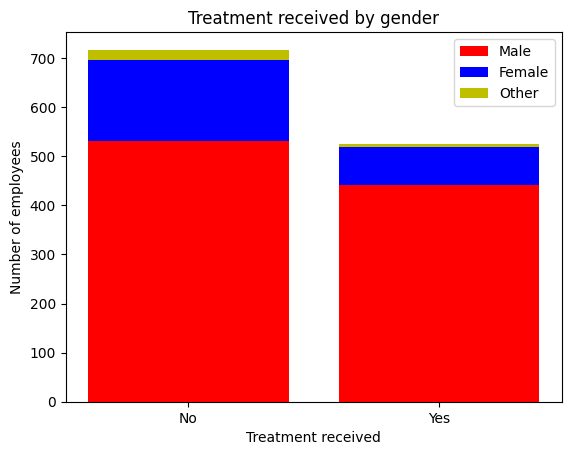

In [ ]:
x = df['treatment'].unique()
y1 = np.array(df[df['Gender'] == 'M']['treatment'].value_counts(sort=False))
y2 = np.array(df[df['Gender'] == 'F']['treatment'].value_counts(sort=False))
y3 = np.array(df[df['Gender'] == 'O']['treatment'].value_counts(sort=False))

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')

plt.xlabel("Treatment received")
plt.ylabel("Number of employees")
plt.legend(["Male", "Female", "Other"])
plt.title("Treatment received by gender")
plt.show()

In [ ]:
df[df['Gender'] == 'M']['treatment'].value_counts(sort = False)

No     531
Yes    442
Name: treatment, dtype: int64

In [ ]:
442/(531+442)

0.45426515930113054

In [ ]:
df[df['Gender'] == 'F']['treatment'].value_counts(sort = False)

Yes    165
No      76
Name: treatment, dtype: int64

In [ ]:
165/(165+76)

0.6846473029045643

In [ ]:
df[df['Gender'] == 'O']['treatment'].value_counts(sort = False)

Yes    21
No      6
Name: treatment, dtype: int64

In [ ]:
21/(21+6)

0.7777777777777778

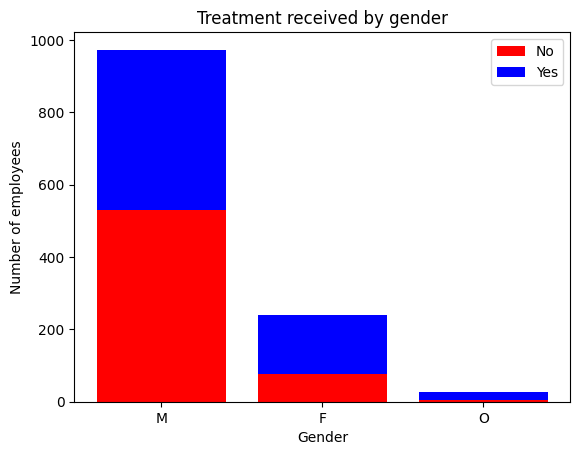

In [ ]:
x = df['Gender'].unique()
y1 = np.array(df[df['treatment'] == 'No']['Gender'].value_counts(sort=False))
y2 = np.array(df[df['treatment'] == 'Yes']['Gender'].value_counts(sort=False))

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')

plt.xlabel("Gender")
plt.ylabel("Number of employees")
plt.legend(["No", "Yes"])
plt.title("Treatment received by gender")
plt.show()

##Plotting the number of people working in each of the 'number of employees' categories

In [ ]:
df['no_employees']

0                  1-5
1                 6-25
2              100-500
3                  1-5
4               26-100
             ...      
1236            26-100
1237            26-100
1238    More than 1000
1239           100-500
1240            26-100
Name: no_employees, Length: 1241, dtype: object

Text(0.5, 1.0, 'Number of employees')

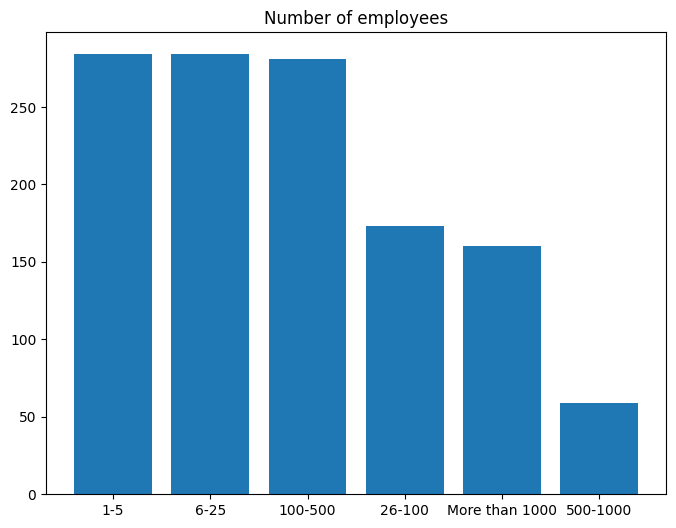

In [ ]:
x = df['no_employees'].unique()
y = df['no_employees'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(x,y)
plt.title("Number of employees")

##Plotting the relationship between age and treatment

In [ ]:
df['Age'].unique().shape

(45,)

In [ ]:
np.array(df[df['treatment'] == 'Yes']['Age'].value_counts(sort=False)).shape

(43,)

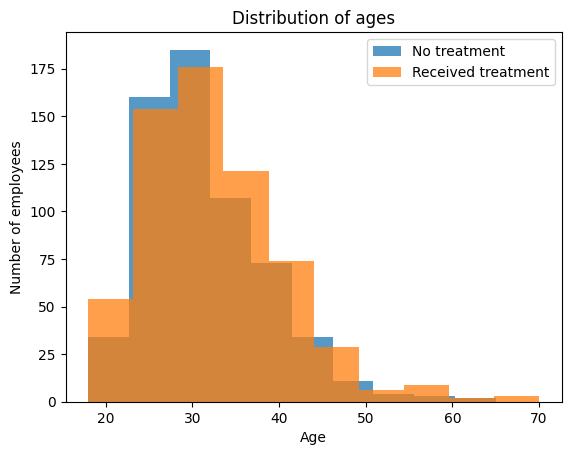

In [ ]:
#x = df['Age'].unique()
y1 = np.array(df[df['treatment'] == 'No']['Age']) #.value_counts(sort=False))
y2 = np.array(df[df['treatment'] == 'Yes']['Age']) #.value_counts(sort=False))

plt.hist(y1, alpha = 0.75)
plt.hist(y2, alpha = 0.75)

plt.xlabel("Age")
plt.ylabel("Number of employees")
plt.legend(["No treatment", "Received treatment"])
plt.title("Distribution of ages")
plt.show()

##Plotting the relationship between remote work and treatment

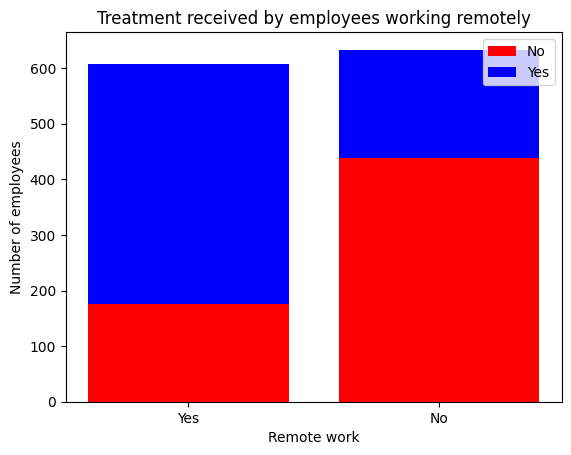

In [ ]:
x = df['remote_work'].unique()
y1 = np.array(df[df['treatment'] == 'No']['remote_work'].value_counts(sort=False))
y2 = np.array(df[df['treatment'] == 'Yes']['remote_work'].value_counts(sort=False))

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')

plt.xlabel("Remote work")
plt.ylabel("Number of employees")
plt.legend(["No", "Yes"])
plt.title("Treatment received by employees working remotely")
plt.show()

#Logistic Regression Model

In [ ]:
import warnings
warnings.filterwarnings('ignore')

##Performing one-hot-encoding and integer encoding on X, and converting our target column to zeros and ones

In [ ]:
for col in df:
  print(col,df[col].unique())

Age [46 36 29 31 41 33 35 34 37 32 30 42 40 27 38 50 24 18 28 26 22 44 23 19
 25 39 45 21 43 56 60 54 70 55 48 20 57 58 47 62 51 65 49 53 61]
Gender ['M' 'F' 'O']
Country ['United States' 'France' 'United Kingdom' 'Canada' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Bulgaria' 'Sweden' 'Colombia' 'Latvia' 'Romania'
 'Belgium' 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Bahamas, The' 'Greece' 'Moldova'
 'Georgia' 'China' 'Czech Republic' 'Philippines']
self_employed ['Yes' 'No']
family_history ['Yes' 'No']
treatment ['No' 'Yes']
no_employees ['1-5' '6-25' '100-500' '26-100' 'More than 1000' '500-1000']
remote_work ['Yes' 'No']
tech_company ['Yes' 'No']
benefits ['Yes' 'No' "Don't know"]
care_options ['Not sure' 'No' 'Yes']
wellness_pr

In [ ]:
df['Country'].value_counts()

United States             740
United Kingdom            183
Canada                     68
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Poland                      7
Sweden                      7
Italy                       7
Belgium                     6
South Africa                6
Brazil                      6
Israel                      5
Singapore                   4
Austria                     3
Bulgaria                    3
Finland                     3
Mexico                      3
Russia                      3
Greece                      2
Denmark                     2
Portugal                    2
Colombia                    2
Croatia                     2
Moldova                     1
China                       1
Georgia                     1
Bahamas, The                1
Czech Repu

In [ ]:
countries = ["United States","United Kingdom","Canada","Germany","Ireland","Netherlands","Australia","France","India"]
for i in range(len(df)):
  if (df.iloc[i, 2] not in countries):
    df.iloc[i, 2] = 'Other'
df['Country'].unique()

array(['United States', 'France', 'United Kingdom', 'Canada', 'Other',
       'Netherlands', 'Australia', 'Germany', 'Ireland', 'India'],
      dtype=object)

In [ ]:
# dataframe of just categorical features
df_categorical = df[['Gender','Country']]

# one-hot encoding categorical features
dummies = pd.get_dummies(df_categorical)
dummies.head()
# dropping the original columns from the dataframe
df = df.drop(['Gender','Country'], axis = 1)

# appending dummies (one-hot encoded categories) to dataframe
df = pd.concat([df, dummies], axis=1)

df.head()

,Age,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,...,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_India,Country_Ireland,Country_Netherlands,Country_Other,Country_United Kingdom,Country_United States
0,46,Yes,Yes,No,1-5,Yes,Yes,Yes,Not sure,Yes,...,0,0,0,0,0,0,0,0,0,1
1,36,Yes,Yes,No,6-25,Yes,Yes,No,No,Yes,...,0,0,1,0,0,0,0,0,0,0
2,29,No,Yes,Yes,100-500,No,Yes,Yes,Yes,No,...,0,0,0,0,0,0,0,0,0,1
3,31,Yes,No,No,1-5,Yes,Yes,No,No,No,...,0,0,0,0,0,0,0,0,0,1
4,46,No,No,Yes,26-100,Yes,Yes,Yes,Yes,No,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)

In [ ]:
for col in df:
  print(col,df[col].unique())

Age [28 18 11 13 23 15 17 16 19 14 12 24 22  9 20 32  6  0 10  8  4 26  5  1
  7 21 27  3 25 37 40 35 44 36 30  2 38 39 29 42 33 43 31 34 41]
self_employed [1 0]
family_history [1 0]
treatment [0 1]
no_employees [0 4 1 2 5 3]
remote_work [1 0]
tech_company [1 0]
benefits [2 1 0]
care_options [1 0 2]
wellness_program [2 1 0]
seek_help [0 1 2]
anonymity [2 1 0]
leave [4 2 1 0 3]
mental_health_consequence [1 0 2]
phys_health_consequence [1 0 2]
coworkers [2 1 0]
supervisor [2 1 0]
mental_health_interview [1 0 2]
phys_health_interview [2 0 1]
mental_vs_physical [2 0 1]
obs_consequence [1 0]
Gender_F [0 1]
Gender_M [1 0]
Gender_O [0 1]
Country_Australia [0 1]
Country_Canada [0 1]
Country_France [0 1]
Country_Germany [0 1]
Country_India [0 1]
Country_Ireland [0 1]
Country_Netherlands [0 1]
Country_Other [0 1]
Country_United Kingdom [0 1]
Country_United States [1 0]


In [ ]:
df.head()

,Age,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,...,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_India,Country_Ireland,Country_Netherlands,Country_Other,Country_United Kingdom,Country_United States
0,28,1,1,0,0,1,1,2,1,2,...,0,0,0,0,0,0,0,0,0,1
1,18,1,1,0,4,1,1,1,0,2,...,0,0,1,0,0,0,0,0,0,0
2,11,0,1,1,1,0,1,2,2,1,...,0,0,0,0,0,0,0,0,0,1
3,13,1,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,28,0,0,1,2,1,1,2,2,1,...,0,0,0,0,0,0,0,0,0,1


##Splitting data into X and y values
X includes all columns except treatment column, and y is only the treatment column.

In [ ]:
X = df.drop(['treatment'], axis=1)
Y = df['treatment']
X.shape

(1241, 33)

In [ ]:
Y.shape

(1241,)

##Train/test split on X and y values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

##Defining and fitting a logistic regression model

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(992, 33) (992, 1) (249, 33) (249,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

LogisticRegression()

##Coefficients of the model

In [ ]:
logit_model.coef_

array([[ 0.02113148, -0.5115365 ,  1.48594092, -0.09203437, -0.03729742,
         0.15459845,  0.34299565,  0.27099317,  0.04868983, -0.14346575,
         0.18180889,  0.04337348,  0.01474796,  0.00550872,  0.59802608,
        -0.34929943,  0.35586417,  0.07957681,  0.04999184,  0.69999477,
        -0.0975576 , -0.81602066,  0.13876104,  0.13999378,  0.30494298,
        -0.78469997, -0.14760333,  0.51050906,  0.09141457, -0.6058609 ,
        -0.64085944,  0.33779972,  0.0195463 ]])

##Finding the accuracy of the model
The accuracy of the model is the number of correct predictions over the total number of predictions.

In [ ]:
y_test_pred = logit_model.predict(X_test)

In [ ]:
y_test_pred

In [ ]:
np.sum(y_test_pred == y_test)/len(y_test)

0.714859437751004

##Creating a confusion matrix
The confusion matrix helps find the number of false negatives and false positives. There are 45 false negatives and 26 false positives.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

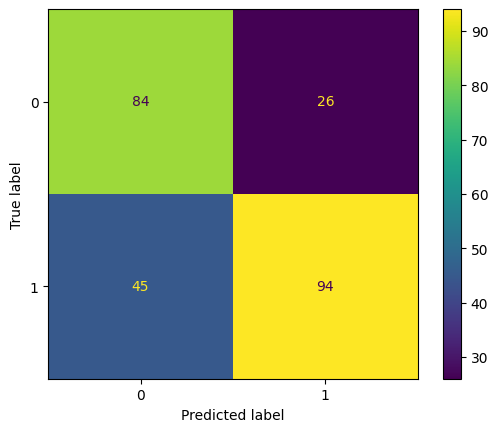

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

## Finding the best combination of dataset features for the logistic regression model

In [ ]:
def logistic_regression_model(X, Y, test_size):
  # 1. Separate training and test set data
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

  # 2. Ensure data is in the numpy array
  X_train = np.array(X_train)
  y_train = np.array(y_train)
  X_test = np.array(X_test)
  y_test = np.array(y_test)

  # 3. Define model and fit the training set data
  logit_model = LogisticRegression()
  logit_model.fit(X_train, y_train)

  # 4. Compute predicted values using training set X
  y_train_pred = logit_model.predict(X_train)

  # 5. Compute predicted values using test set X
  y_test_pred = logit_model.predict(X_test)

  test_acc = np.sum(y_test_pred == y_test)/len(y_test)
  train_acc = np.sum(y_train_pred == y_train)/len(y_train)

  return {
      "model": logit_model,
      "accuracy": [train_acc, test_acc],
      "test_predictions": [y_test, y_test_pred]
  }

In [ ]:
#Test
test_result = logistic_regression_model(X, Y, 0.3)
test_result['accuracy']

[0.7328629032258065, 0.714859437751004]

In [ ]:
results = []
models = []
preds = []

for i in range(1000):
  sampleX = X.sample(n=np.random.choice(list(range(1, X.shape[1]))), axis='columns')
  test_result = logistic_regression_model(sampleX, Y, 0.2)
  results.append(test_result['accuracy'][1])
  models.append(test_result['model'])
  preds.append(test_result['test_predictions'])

In [ ]:
np.argmax(results)

480

##Best model

In [ ]:
results[np.argmax(results)]

0.7349397590361446

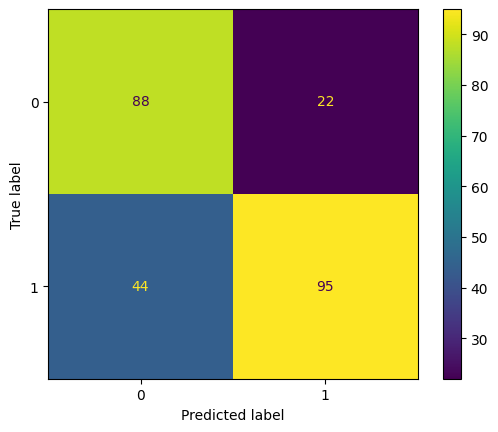

In [ ]:
y_test = preds[np.argmax(results)][0]
y_test_pred = preds[np.argmax(results)][1]
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

##Exporting cleaned data

In [ ]:
df.to_csv('/content/drive/My Drive/survey_cleaned2.csv',index =False)

#Neural Network

In [ ]:
df = pd.read_csv('/content/drive/My Drive/survey_cleaned2.csv')
import tensorflow as tf # for neural network models
print(tf.__version__)

2.12.0


##Splitting dataset into X and y values

In [ ]:
X = df.drop(['treatment'], axis=1)
Y = df['treatment']
X.shape

(1241, 33)

##Normalizing each column in  𝑋  to be between 0 and 1

In [ ]:
# Your code here
X = (X-X.min())/(X.max()-X.min())

In [ ]:
X['Age'].max()

1.0

##Train/test split on the $X$ and $y$ values

In [ ]:
# Your code here

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
# Your code here

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(992, 33) (992,) (249, 33) (249,)


##Building and training a simple neural network

In [ ]:
model = tf.keras.models.Sequential([
  #tf.keras.layers.Dense(100, activation='relu'), # hidden layer
  #tf.keras.layers.Dense(75, activation='relu'), # hidden layer
  tf.keras.layers.Dense(15, activation='relu'), # hidden layer
  tf.keras.layers.Dense(2, activation='softmax') # output layer

])

##Accuracy of the best neural network model

In [ ]:
# compile model
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 15)

Epoch 1/15
31/31 [==============================] - 1s 2ms/step - loss: 0.6882 - accuracy: 0.5373
Epoch 2/15
31/31 [==============================] - 0s 2ms/step - loss: 0.6665 - accuracy: 0.5857
Epoch 3/15
31/31 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6200
Epoch 4/15
31/31 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.6482
Epoch 5/15
31/31 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.6562
Epoch 6/15
31/31 [==============================] - 0s 2ms/step - loss: 0.6090 - accuracy: 0.6673
Epoch 7/15
31/31 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.6744
Epoch 8/15
31/31 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.6915
Epoch 9/15
31/31 [==============================] - 0s 2ms/step - loss: 0.5846 - accuracy: 0.6946
Epoch 10/15
31/31 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.7046
Epoch 11/15
31/31 [

In [ ]:
# Get predictions on test set
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)
# Find accuracy on test set
print('Test accuracy: ', np.mean(y_test == predictions))

8/8 [==============================] - 0s 2ms/step
Test accuracy:  0.714859437751004


##Creating a confusion matrix for the model

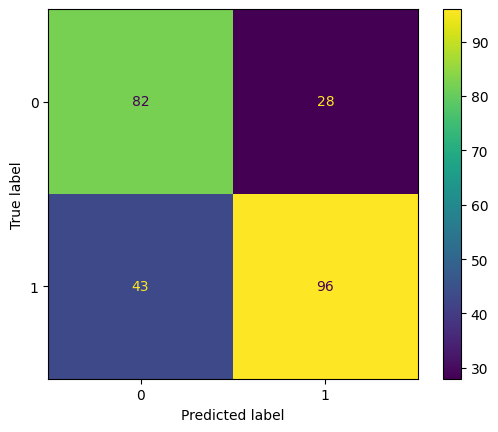

In [ ]:
# Your code here
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
# percent of false positives
26/(26+45)

0.36619718309859156

##Fine-tuning model architecture

In [ ]:
# Split train set into a train and validation set
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, random_state = 0, test_size = 0.2)
X_train.shape, X_valid.shape

((793, 33), (199, 33))

In [ ]:
#define a helper function that will build the model inside a loop.
def build_model(n_hidden=1, n_neurons=30):
    model = tf.keras.models.Sequential()

    # Start by flattening image
    model.add(tf.keras.layers.Flatten())

    # Add n_hidden number of hidden layers, each with n_neurons
    for layer in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))

    # Output layer -> 10 neurons for 10 digits, with softmax activation
    model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

    # Compile model
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [ ]:
num_layers = [1,3,5,8,15,20]
num_neurons = [10,30,50,70,100,110]


for n_hidden in num_layers:

  for n_neurons in num_neurons:
    model = build_model(n_hidden, n_neurons)

    print('Number of hidden layers: ', n_hidden)
    print('Number of neurons per layer: ', n_neurons)
    history = model.fit(X_train, y_train, epochs=10,
                    validation_data=[X_valid, y_valid])

Number of hidden layers:  1
Number of neurons per layer:  10
Epoch 1/10
25/25 [==============================] - 1s 17ms/step - loss: 2.2267 - accuracy: 0.2472 - val_loss: 2.0389 - val_accuracy: 0.3518
Epoch 2/10
25/25 [==============================] - 0s 6ms/step - loss: 1.7889 - accuracy: 0.4943 - val_loss: 1.5914 - val_accuracy: 0.4422
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 1.3732 - accuracy: 0.5183 - val_loss: 1.1912 - val_accuracy: 0.4824
Epoch 4/10
25/25 [==============================] - 0s 5ms/step - loss: 1.0601 - accuracy: 0.5120 - val_loss: 0.9431 - val_accuracy: 0.5578
Epoch 5/10
25/25 [==============================] - 0s 6ms/step - loss: 0.8873 - accuracy: 0.5259 - val_loss: 0.8202 - val_accuracy: 0.6030
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.8000 - accuracy: 0.5624 - val_loss: 0.7577 - val_accuracy: 0.6030
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 0.7518 - accuracy: 0.5839 

##Neural network visualization
This will help us visualize the loss and accuracy of the best neural network model.

In [ ]:
import tensorflow as tf # for neural network models
print(tf.__version__)

2.12.0


In [ ]:
X = df.drop(['treatment'], axis=1)
Y = df['treatment']
X.shape

(1241, 33)

In [ ]:
X = (X - X.min())/(X.max()-X.min())

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(992, 33) (992,) (249, 33) (249,)


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(5, activation='relu'), # hidden layer
  tf.keras.layers.Dense(5, activation='relu'), # hidden layer
  tf.keras.layers.Dense(5, activation='relu'), # hidden layer
  tf.keras.layers.Dense(10, activation='relu'), # hidden layer
  tf.keras.layers.Dense(10, activation='relu'), # hidden layer
  tf.keras.layers.Dense(15, activation='relu'), # hidden layer
  tf.keras.layers.Dense(2, activation='softmax') # output layer
])

In [ ]:
model.compile(
    optimizer = 'adam', # for this course, we always use adam
    loss = 'sparse_categorical_crossentropy', # since this is classification, we use categorical crossentropy (rather than MSE)
    metrics=['accuracy']) # we'll evaluate based on the accuracy of our predictions

In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 25) # have to assign the fit function to a variable

Epoch 1/25
28/28 [==============================] - 2s 11ms/step - loss: 0.6899 - accuracy: 0.5258 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 2/25
28/28 [==============================] - 0s 4ms/step - loss: 0.6822 - accuracy: 0.5852 - val_loss: 0.6896 - val_accuracy: 0.5700
Epoch 3/25
28/28 [==============================] - 0s 5ms/step - loss: 0.6730 - accuracy: 0.6110 - val_loss: 0.6808 - val_accuracy: 0.5800
Epoch 4/25
28/28 [==============================] - 0s 4ms/step - loss: 0.6603 - accuracy: 0.6267 - val_loss: 0.6679 - val_accuracy: 0.5900
Epoch 5/25
28/28 [==============================] - 0s 4ms/step - loss: 0.6442 - accuracy: 0.6491 - val_loss: 0.6536 - val_accuracy: 0.6000
Epoch 6/25
28/28 [==============================] - 0s 4ms/step - loss: 0.6292 - accuracy: 0.6637 - val_loss: 0.6423 - val_accuracy: 0.6100
Epoch 7/25
28/28 [==============================] - 0s 4ms/step - loss: 0.6213 - accuracy: 0.6670 - val_loss: 0.6342 - val_accuracy: 0.6100
Epoch 8/25
28/28 [=

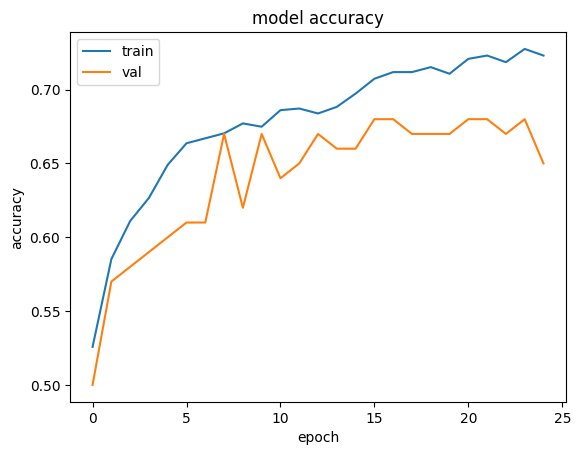

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

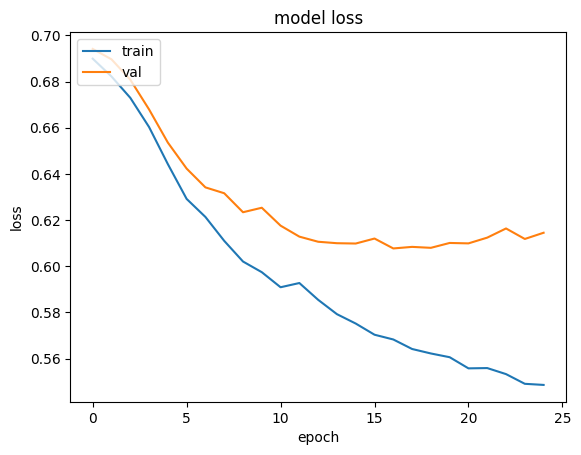

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Get predictions on test set
predictions = model.predict(X_test) # gives us predicted probabilities for each digit
predictions = np.argmax(predictions, axis = 1) # makes predicted digit the classification with highest probability

# Find accuracy on test set
print('Test accuracy: ', np.mean(y_test == predictions))

8/8 [==============================] - 0s 3ms/step
Test accuracy:  0.7028112449799196


#Random Forest

In [ ]:
df = pd.read_csv('/content/drive/My Drive/survey_cleaned2.csv')
from sklearn import tree

##Split dataset into X and y values

In [ ]:
X = df.drop(['treatment'], axis=1)
Y = df['treatment']
X.shape

(1241, 33)

##Train/test split on the $X$ and $y$ values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(992, 33) (992,) (249, 33) (249,)


##Creating and training a decision tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

##Creating and training a random forest and assessing performance
A Random Forest is a series of decision trees.

In [ ]:
y_test_pred = clf.predict(X_test)
np.sum(y_test_pred == y_test)/len(y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
for x in range(1,30):
  clf = RandomForestClassifier(max_depth=x, random_state=0)
  clf.fit(X_train, y_train)
  y_test_pred = clf.predict(X_test)
  print('Number of trees: ', x)
  print(np.sum(y_test_pred == y_test)/len(y_test))

Number of trees:  1
0.6706827309236948
Number of trees:  2
0.6867469879518072
Number of trees:  3
0.7028112449799196
Number of trees:  4
0.7068273092369478
Number of trees:  5
0.7068273092369478
Number of trees:  6
0.6907630522088354
Number of trees:  7
0.7028112449799196
Number of trees:  8
0.6987951807228916
Number of trees:  9
0.6666666666666666
Number of trees:  10
0.6907630522088354
Number of trees:  11
0.6746987951807228
Number of trees:  12
0.7028112449799196
Number of trees:  13
0.6987951807228916
Number of trees:  14
0.6947791164658634
Number of trees:  15
0.6947791164658634
Number of trees:  16
0.6827309236947792
Number of trees:  17
0.6827309236947792
Number of trees:  18
0.6827309236947792
Number of trees:  19
0.6907630522088354
Number of trees:  20
0.678714859437751
Number of trees:  21
0.6827309236947792
Number of trees:  22
0.6907630522088354
Number of trees:  23
0.6867469879518072
Number of trees:  24
0.6827309236947792
Number of trees:  25
0.6827309236947792
Number of 